Trying to mimic this:https://nbremer.github.io/olympicfeathers/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("olympic_winners.csv")

In [17]:
rowing_recent = df[(df['Discipline']=='Rowing')&(df['Edition']>2000)].groupby(['Edition', 'Event_gender', 'Continent']).sum()[['NumMedals']]

In [23]:
rowing_recent.columns

Index(['NumMedals'], dtype='object')

In [26]:
rowing_recent.loc(axis=0)[2016,:,:]

NumMedals
Edition Event_gender Continent           
2016    M            Europe             6
                     Oceania            2
        W            Americas           1
                     Europe             4
                     Oceania            1

In [41]:
df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Plot'] = 'blue'

In [ ]:
Blue (NCS) (#0085C7), Golden Poppy (#F4C300), Black (#000000), Green (Pantone) (#009F3D) and Cadmium Red (#DF0024)

In [45]:
colour_dict = {'Europe':'#0085C7', 'Asia': '#F4C300', 'Africa': '#000000', 
               'Oceania': '#009F3D', 'Americas': '#DF0024'}

In [112]:
df_year

NumMedals  CumSum      Norm   Colour     Width  \
Event_gender Continent                                                   
M            Europe             6       6  0.294524  #0085C7  0.294524   
             Oceania            2       8  0.392699  #009F3D  0.098175   
W            Americas           1       1  0.049087  #DF0024  0.049087   
             Europe             4       5  0.245437  #0085C7  0.196350   
             Oceania            1       6  0.294524  #009F3D  0.049087   

                            Plot  
Event_gender Continent            
M            Europe     1.079922  
             Oceania    1.178097  
W            Americas   0.736311  
             Europe     0.539961  
             Oceania    0.490874

In [114]:
3*np.pi/8

1.1780972450961724

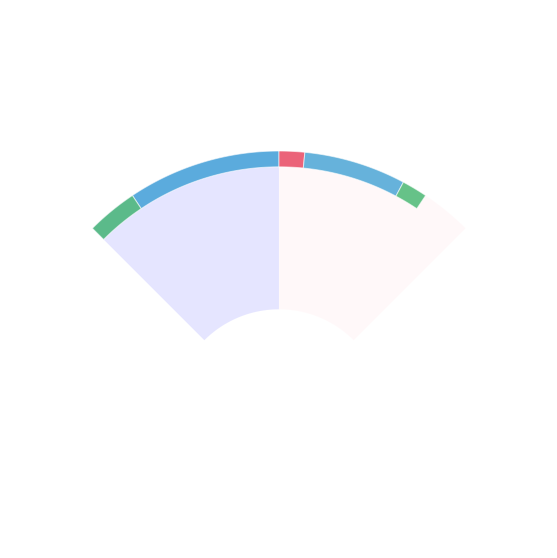

In [132]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize = (10,10))

size = 0.3
angle_modifier = 1/4

for years in [2016]:
    df_year = rowing_recent.loc(axis=0)[years,:,:].reset_index('Edition', drop=True).copy()
    
    max_value = df_year.groupby('Event_gender').sum().max().values[0]
    
    df_year['CumSum'] = df_year.groupby('Event_gender').cumsum()
    df_year['Norm'] = df_year['CumSum']/max_value * angle_modifier*np.pi
    df_year['Colour'] = df_year.index.get_level_values('Continent').map(colour_dict)
    df_year['Width'] = df_year['NumMedals']/ max_value* angle_modifier*np.pi
    df_year['Plot'] = np.nan
    
    
#     df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Colour'] = 'blue'
#     df_year.loc[df_year.index.get_level_values('Event_gender')=='W', 'Colour'] = 'pink'
    
    df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Plot'] =\
                    df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Norm'] + 2*angle_modifier*np.pi
    
    df_year.loc[df_year.index.get_level_values('Event_gender')=='W', 'Plot'] =\
                    -df_year.loc[df_year.index.get_level_values('Event_gender')=='W', 'Norm'] + 2*angle_modifier*np.pi
    
    ax.bar(x=[0.5*np.pi*angle_modifier*2, np.pi*angle_modifier*2],
#              2.5*np.pi*angle_modifier*2, 3*np.pi*angle_modifier*2],
       width=np.pi*angle_modifier, bottom=0.2, height=size,
       color=['pink', 'blue'], edgecolor='w', linewidth=1, align="edge", alpha = 0.1)
    
    df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Width'] =\
                    -df_year.loc[df_year.index.get_level_values('Event_gender')=='M', 'Width'] 
    ax.bar(x=df_year['Plot'],
       width=df_year['Width'], bottom=0.47, height=size/10,
       color=df_year['Colour'], edgecolor='w', linewidth=1, align="edge", alpha = 0.6)
    
    ax.set_xlim(0,np.pi)
    ax.set_axis_off
    ax.axis('off')
    plt.show()

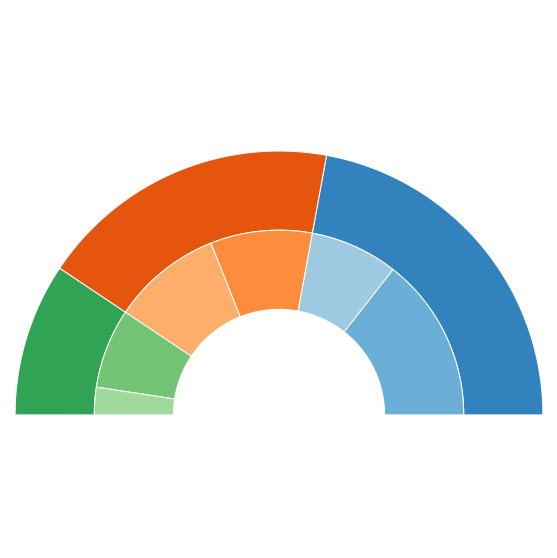

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize = (10,10))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

# ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_xlim(0,np.pi)
ax.set_axis_off
ax.axis('off')
plt.show()